# ResamplingDatetimeData

## Task

> Part 1) Load the data and make a datetime index.

You must first load the data and create a datetime index.

- Convert the date column to datetime dtype.
- Set the date column as the index.
- Filter out only the required data:
- Keep only data from the year 2000 or later.
- Keep only the following features:
  - precipitation
  - mean_temp
  - min_temp
  - max_temp
  - snow_depth
- Impute any missing values.
  - Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!

> Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)

- For each of the following questions, make a new copy of the dataframe resampled to the correct frequency for the question.
- Plot the feature that the question is asking about.
If there is a specific time period, plot only that time period.
 * Note: you may want to make a temporary DataFrame that you will use to answer this question only.


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import seaborn as sns


import missingno as miss
import datetime as dt
import statsmodels.tsa.api as tsa

sns.set_context('notebook',font_scale=0.9)
plt.style.use(['ggplot'])

### Upload Data

In [2]:
filename = 'Data/london_weather.csv'
df = pd.read_csv(filename)
#displaying first and last rows
display(df.head())
df.tail()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN
15340,20201231,7.0,1.3,34.0,1.5,-0.8,-3.1,0.0,100500.0,NaN


In [3]:
#verifying how many rows/columns, datatypes, missing items and duplicate rows
print(df.info())
print(('-'*30))
print(f'There are {df.duplicated().sum()} duplicate rows.')
print(('-'*30))
print(f'There are {df.isna().sum().sum()} missing values.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB
None
------------------------------
There are 0 duplicate rows.
------------------------------
There are 4914 missing values.


In [4]:
#Add a datetime column based on the string in the "date" column
df['datetime'] = pd.to_datetime(df['date'],format='%Y%m%d', errors='raise')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  int64         
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
 10  datetime          15341 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979-01-01
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979-01-02
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979-01-03
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979-01-04
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979-01-05


In [5]:
#setting the datetime column as index
df = df.set_index('datetime')
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='datetime', length=15341, freq=None)

In [6]:
#changing frequency
df = df.asfreq("D")
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='datetime', length=15341, freq='D')

In [7]:
#filtering out all requested data
df=df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 
                      'max_temp', 'snow_depth']]
df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


In [8]:
#verifying null values
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [9]:
df.head(20)

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
2000-01-06,0.0,8.9,7.0,11.0,0.0
2000-01-07,2.0,7.2,3.4,9.2,0.0
2000-01-08,0.0,7.4,5.7,7.2,0.0
2000-01-09,0.2,3.2,-0.7,7.8,0.0


In [10]:
#filling snow depth column with beforefill
df['snow_depth'] = df['snow_depth'].fillna(method='ffill')

In [11]:
df.isna().sum()

precipitation    390
mean_temp        419
min_temp         386
max_temp         390
snow_depth         0
dtype: int64

In [12]:
#filling remainder columns with interpolate
df=df.interpolate()

In [13]:
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

**Q1: What month had the most precipitation between 2000 through 2010?**

- Resample the data as Monthly frequency.
- Find the date and corresponding value for the max precipitation.
- Plot the feature and time period that corresponds to the question.
  - Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the most precipitation (the max precipitation).
- Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
  - Make sure to add a legend so that your label is visible.

**Q1 Visualization Requirements**
- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
  - Create a wide figure (e.g. figsize=(12,3))
    - With the title "Precipitation for 2000-2010"
    - With a ylabel of "Inches"
  - Customize the major xaxis ticks to:
    - Have major xaxis ticks every 1 year.
    - Use 4-digit years for the labels
    - Rotate the major ticks' labels 90 degrees.
  - Customize the minor xaxis ticks to:
     - Have minor xaxis ticks every 3 months
     - Do not label the minor ticks.

In [14]:
df1 = df.loc['2000':'2010'].copy()
df1

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2010-12-27,5.0,0.2,-4.6,8.0,1.0
2010-12-28,0.4,5.3,2.5,9.5,0.0
2010-12-29,1.4,6.8,4.1,7.7,0.0


In [15]:
#change frequecy to Monthly and get average for month
df_monthly = df1.resample("MS").mean()
df_monthly

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-01,0.467742,5.614516,2.648387,8.482258,0.000000
2000-02-01,2.234483,7.181034,3.903448,10.293103,0.000000
2000-03-01,0.448387,8.491935,4.891935,12.175806,0.000000
2000-04-01,2.750000,8.996667,5.275000,13.161667,0.000000
2000-05-01,2.516129,13.798387,9.529032,17.945161,0.000000
...,...,...,...,...,...
2010-08-01,2.980645,17.485484,13.330645,21.587097,0.000000
2010-09-01,1.486667,15.406667,11.350000,19.278333,0.000000
2010-10-01,2.035484,11.850000,8.495161,15.074194,0.000000


In [16]:
max_pre = df_monthly['precipitation'].idxmax()
max_pre

Timestamp('2000-10-01 00:00:00', freq='MS')

In [17]:
df_monthly.loc[max_pre]

precipitation     4.925806
mean_temp        11.680645
min_temp          8.540323
max_temp         14.387097
snow_depth        0.000000
Name: 2000-10-01 00:00:00, dtype: float64

In [18]:
precipitation = df_monthly.loc[max_pre,'precipitation']
precipitation

4.925806451612903

In [19]:
## Change the default figure size to something wider (12,5)
plt.rcParams['figure.figsize'] = (12,5)

In [20]:
## CREATE ARTISTS FOR MAJOR XTICKS (Years)
# Create a year locator

loc_major_yr = mdates.YearLocator()

# Create a year formatter using 4-digit years
fmt_major_yr = mdates.DateFormatter("%Y")


## CREATE ARTISTS FOR MINOR XTICKS ( Months)
# Create a month locator that will add months at 1,4,7,10

loc_minor_3m = mdates.MonthLocator(bymonth=[1,4,7,10])

# Createa monthnformatter that will use 3-letter month names
#fmt_minor_3m = mdates.DateFormatter("%b")

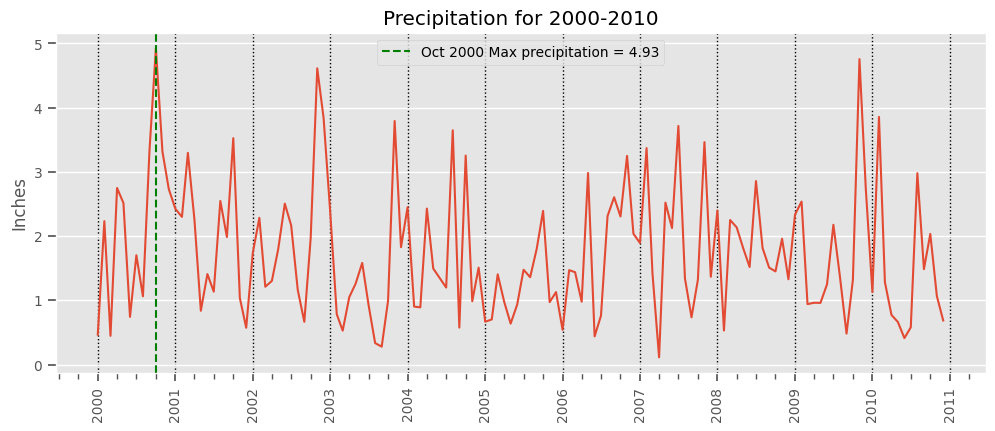

In [21]:
## plotting precipitation
monthly_prec = df_monthly['precipitation']

## Create our plot and save the ax
fig, ax = plt.subplots()
ax.plot(monthly_prec.index, monthly_prec.values)

ax.set(ylabel="Inches", title='Precipitation for 2000-2010')

# Set xaxis major locator/formatter
ax.xaxis.set_major_locator(loc_major_yr)
ax.xaxis.set_major_formatter(fmt_major_yr)


# Set xaxis minor locator/formatter
ax.xaxis.set_minor_locator(loc_minor_3m)
#ax.xaxis.set_minor_formatter(fmt_minor_3m)

# Add gridlines for major xaxis ticks
ax.grid(which='major',axis='x',color='k',ls=':',lw=1)

## Rotate the major tick years using fig.autofmt_xdate
fig = ax.get_figure()
fig.autofmt_xdate(which='major', rotation=90,ha='center')

fmt = "%b %Y"
ax.axvline(max_pre, ls='--',color='green', 
           label=f"{max_pre.strftime(fmt)} Max precipitation = {precipitation.round(2)}")
ax.legend(loc='upper center');

**Q2: Which year between 2000-2020 had the coolest average temperature?**

- Resample the data as Yearly frequency.

- Plot the feature and time period that corresponds to the question.
  - Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the lowest mean temp.
- Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.



**Q2 Visualization Requirements**

- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
  - Create a wide figure (e.g. figsize=(12,3))
     - With the title "Average Temperature"
     - With a ylabel of "Degrees"
  - Customize the major xaxis ticks to:
     - Have major xaxis ticks every 5 years.
     - Use 4-digit years for the labels
     - Rotate the major ticks' labels 90 degrees.
  - Customize the minor xaxis ticks to:
     - Have minor xaxis ticks every 1 year
     - Do not label the minor ticks.

In [22]:
df2 = df.loc['2000':'2020'].copy()
df2

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,0.0
2020-12-28,0.2,1.1,-1.3,3.6,0.0
2020-12-29,0.0,2.6,1.1,4.1,0.0


In [23]:
#change frequecy to yearly and get yearly average
df_yearly = df2.resample("AS").mean()
df_yearly

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-01,2.182787,11.575683,8.001503,15.144672,0.008197
2001-01-01,1.944384,11.331507,7.647397,15.036575,0.000000
2002-01-01,2.102192,12.084247,8.425890,15.815205,0.000000
2003-01-01,1.313151,12.114521,7.895890,16.360274,0.024658
2004-01-01,1.733470,11.900683,8.234563,15.549044,0.005464
2005-01-01,1.209863,11.822877,7.973562,15.676849,0.008219
2006-01-01,1.762740,12.290822,8.506301,16.152055,0.000000
2007-01-01,1.941370,11.944384,8.120137,15.814932,0.041096
2008-01-01,1.805738,11.326776,7.568852,15.156831,0.010929


In [24]:
min_temp = df_yearly['min_temp'].idxmin()
min_temp

Timestamp('2010-01-01 00:00:00', freq='AS-JAN')

In [25]:
temp = df_yearly.loc[min_temp,'min_temp'].round(2)
temp

6.8

In [26]:
# Create a year locator

loc_major_yr = mdates.YearLocator(5)

# Create a year formatter using 4-digit years
fmt_major_yr = mdates.DateFormatter("%Y")

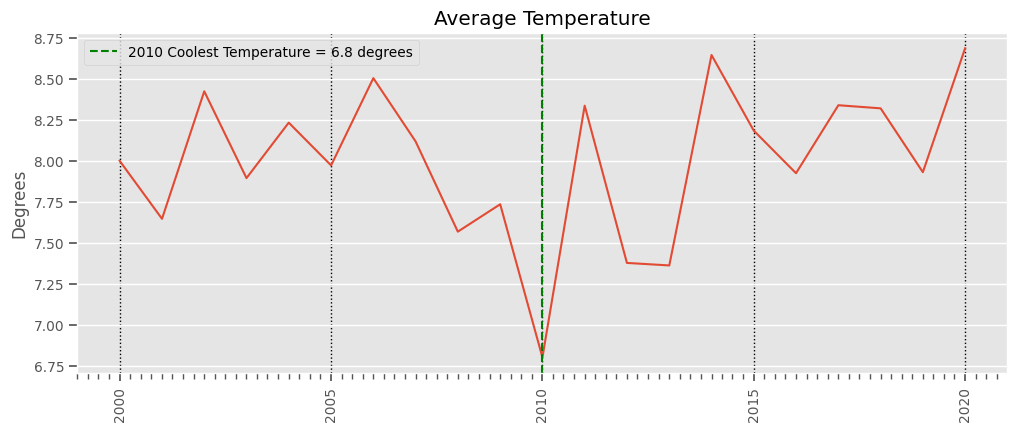

In [29]:
## plotting temperature
yearly_temp = df_yearly['min_temp']

## Create our plot and save the ax
fig, ax = plt.subplots()
ax.plot(yearly_temp.index, yearly_temp.values)

ax.set(ylabel="Degrees", title='Average Temperature')

# Set xaxis major locator/formatter
ax.xaxis.set_major_locator(loc_major_yr)
ax.xaxis.set_major_formatter(fmt_major_yr)


# Set xaxis minor locator/formatter
ax.xaxis.set_minor_locator(loc_minor_3m)
#ax.xaxis.set_minor_formatter(fmt_minor_3m)

# Add gridlines for major xaxis ticks
ax.grid(which='major',axis='x',color='k',ls=':',lw=1)

## Rotate the major tick years using fig.autofmt_xdate
fig = ax.get_figure()
fig.autofmt_xdate(which='major', rotation=90,ha='center')

fmt = "%Y"
ax.axvline(min_temp, ls='--',color='green', 
           label=f"{min_temp.strftime(fmt)} Coolest Temperature = {temp} degrees")

ax.legend(loc='upper left');